In [1]:
# Importing
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN not available)


In [2]:
geo_data = GeMpy.import_data([0,200,0,10,0,100], [200,4,100],
                    path_i = "../input_data/interfaces_risk.csv",
                    path_f = "../input_data/foliations_risk.csv")

#geo_data.interfaces["Y"] = geo_data.interfaces["Y"]+2
#geo_data.foliations["Y"] = geo_data.foliations["Y"]+2
GeMpy.set_grid(geo_data)

In [3]:
GeMpy.set_data_series(geo_data, {"Initial": (geo_data.formations[0],
                                  geo_data.formations[1],
                                  geo_data.formations[2]),
                      "Unconformity": geo_data.formations[3]},
                     order_series = ['Unconformity', 'Initial'])


In [4]:
GeMpy.get_raw_data(geo_data).head()

G_x  G_y  G_z  Unnamed: 0     X    Y     Z  azimuth  dip  \
interfaces 0  NaN  NaN  NaN           1   0.0  0.0  39.0      NaN  NaN   
           1  NaN  NaN  NaN           2   0.0  0.0  24.0      NaN  NaN   
           2  NaN  NaN  NaN           3   0.0  0.0   7.0      NaN  NaN   
           3  NaN  NaN  NaN           5   0.0  0.0  63.0      NaN  NaN   
           4  NaN  NaN  NaN           6  10.0  0.0  47.0      NaN  NaN   

             formation  polarity        series  
interfaces 0    Layer1       NaN       Initial  
           1    Layer2       NaN       Initial  
           2    Layer3       NaN       Initial  
           3    Layer5       NaN  Unconformity  
           4    Layer1       NaN       Initial

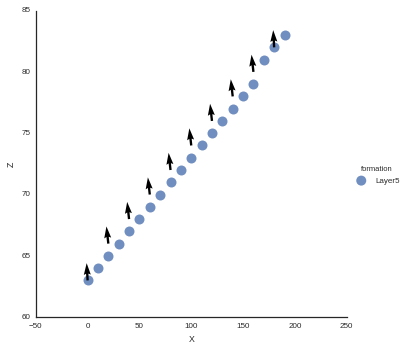

In [5]:
GeMpy.plot_data(geo_data, series = 'Unconformity')

In [6]:
GeMpy.set_interpolator(geo_data, u_grade = 0, verbose = 0)

In [7]:
GeMpy.compute_block_model(geo_data, [0,1 ], verbose = 0)

Final block computed

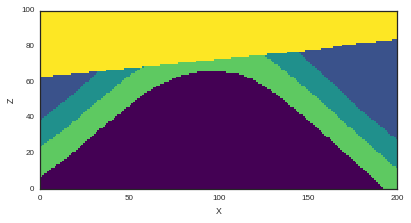

In [8]:
GeMpy.plot_section(geo_data, 2, direction="y")

In [ ]:
import pymc as pm

inter = geo_data.interpolator._data.interfaces

Z_unc = pm.Normal('Z_unc', inter['Z'], 1./np.square(1))

@pm.deterministic
def model(value=0, Z_unc = Z_unc):
    geo_data.interpolator._data.interfaces['Z'] = pn.DataFrame(Z_unc)
    GeMpy.compute_block_model(geo_data, u_grade = 0)
   # print(geo_data.interpolator._data.interfaces)
    return geo_data.interpolator.block.get_value()

pymc_model = pm.Model([Z_unc, model])